# From [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

## Select the dataset

### Read data from archive.
Look at the data and try to understand if:
1. if it is a `csv` file or other
1. for `csv`, what is the *separator* character (`,`,`;`,`\t`, ...)
1. for `csv`, is there a *header*? it is a first row containing column names
1. if there is no header, look for reasonable names, e.g. for *UCI* a `.names` file
1. if there is no header, look at the documentation of `read_csv` to see how to specify column names
1. try to understand if the dataset is supervised, and what is the *target class*

The download url is 
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Use the read_csv() method of pandas dataframe https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Use `df` as the dataframe name

Assign column names if necessary


In [3]:
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# adjust the line below, if necessary
url = '../datasets/breast-cancer.csv'
df = pd.read_csv(url, header=None, names=['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'])

### Show column names
Use the `columns` attribute of pandas on `df`

In [17]:
df.columns
df = df.replace(["?"], np.NaN)
df = df.dropna()

### Show portion of data
Use the `head` method of pandas dataframe

In [18]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### Show histograms for all numeric values 
Use the `DataFrame.hist` method of Pandas. You can set the `figsize` parameter to adjust size

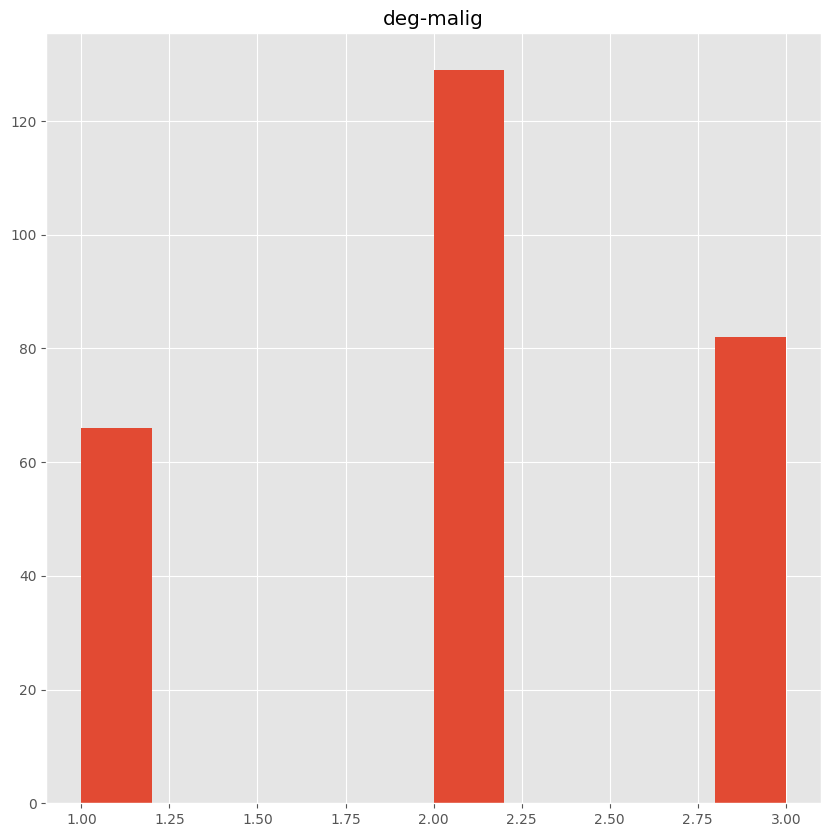

In [19]:
pd.DataFrame.hist(df, figsize = [10,10]);

Is there anything to observe? balanced distributions? skewed distributions? outliers?

### Show synthetic description

The **describe** method of pandas dataframes gives a short summary

Examine in the documentation if there are interesting options in the method

In [20]:
df.describe(include= "O")

,class,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat
count,277,277,277,277,277,277,277,277,277
unique,2,6,3,11,7,2,2,5,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,196,91,149,57,209,221,145,106,215


Are there *missing values*? How could we see it from the description?

### Plot an histogram for "the target column"
Use the `hist` method of `matplotlib.pyplot` applied to the target column of `df`

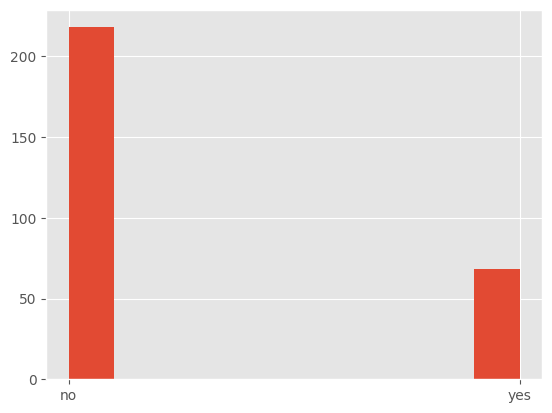

In [8]:
### adjust the line below
plt.hist(df['irradiat'])
plt.show()

## Pairplot
The `pairplot` of the *Seaborn* library is a powerful data exploration tool. It shows a plot of pairs of numeric attributes, and may represent as color the attribute chosen as class (the `hue` parameter). In this specific case the high number of attributes makes the representation not very clear.

Use df as argument to the `pairplot` method of Seaborn, specifying also `hue = '...'` and `diag_kind='kde'` (try also other options)

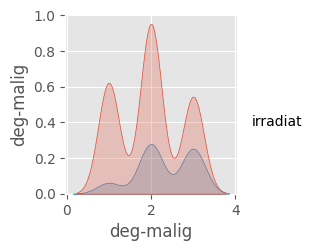

In [9]:
sns.pairplot(df, hue = 'irradiat'
             , diag_kind='kde'
            );

## Show the *correlation*
[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
[Wikipedia Reference](https://en.wikipedia.org/wiki/Correlation)

/tmp/ipykernel_16668/341920890.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[df.columns].corr()


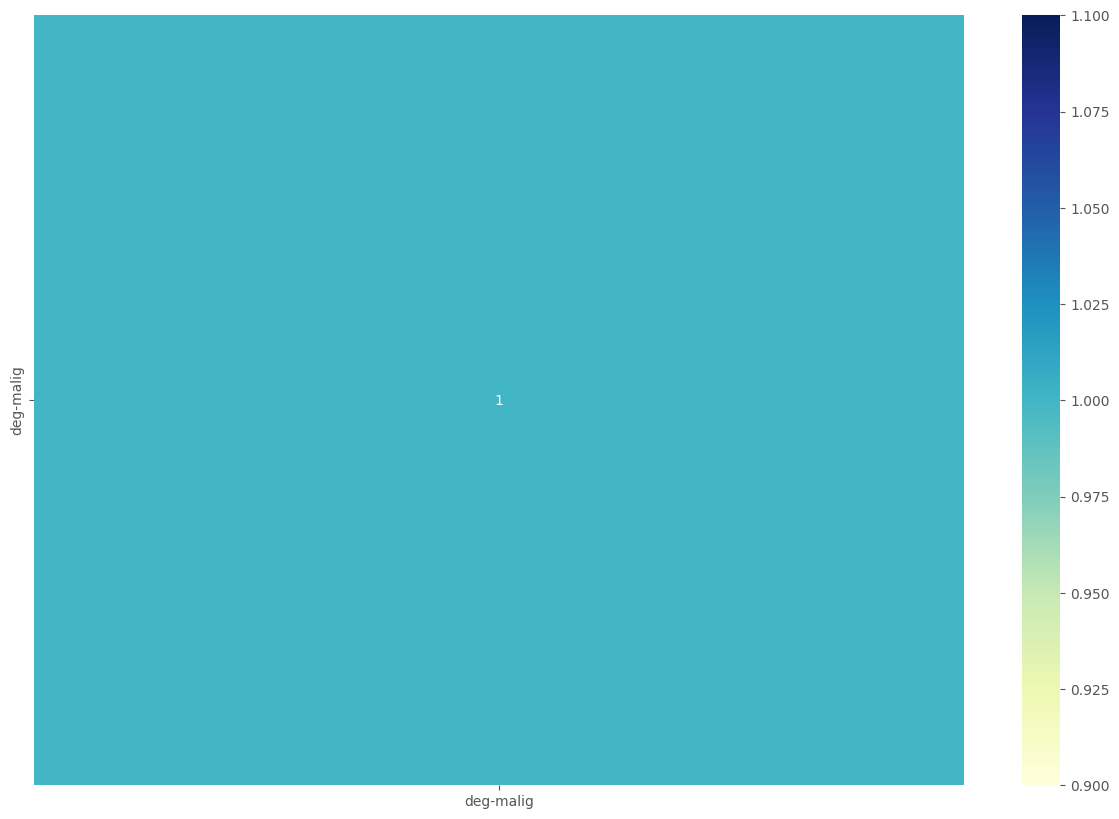

In [10]:
corr = df[df.columns].corr()
plt.figure(figsize=(15,10)) # set X and Y size
sns.heatmap(corr, cmap="YlGnBu", annot=True);

## Boxplot
Now we will explore the distribution of the values inside each column using the `boxplot`.

This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data <br> (*from the official Seaborn documentation*)

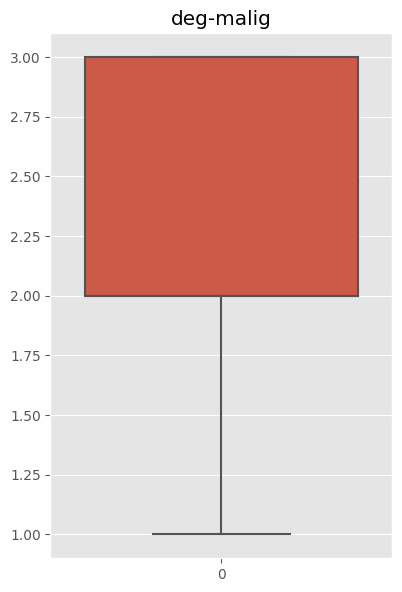

In [13]:
#--Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns[[str(x) != 'object' for x in df.dtypes]]:
    plt.subplot(2, 3, pos)
    plt.title(i)
    sns.boxplot(data=df[i])
    pos += 1

Comment what you see, are there relevant situations? outliers?

### Another way to produce a *boxplot*

/home/andrea/.local/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


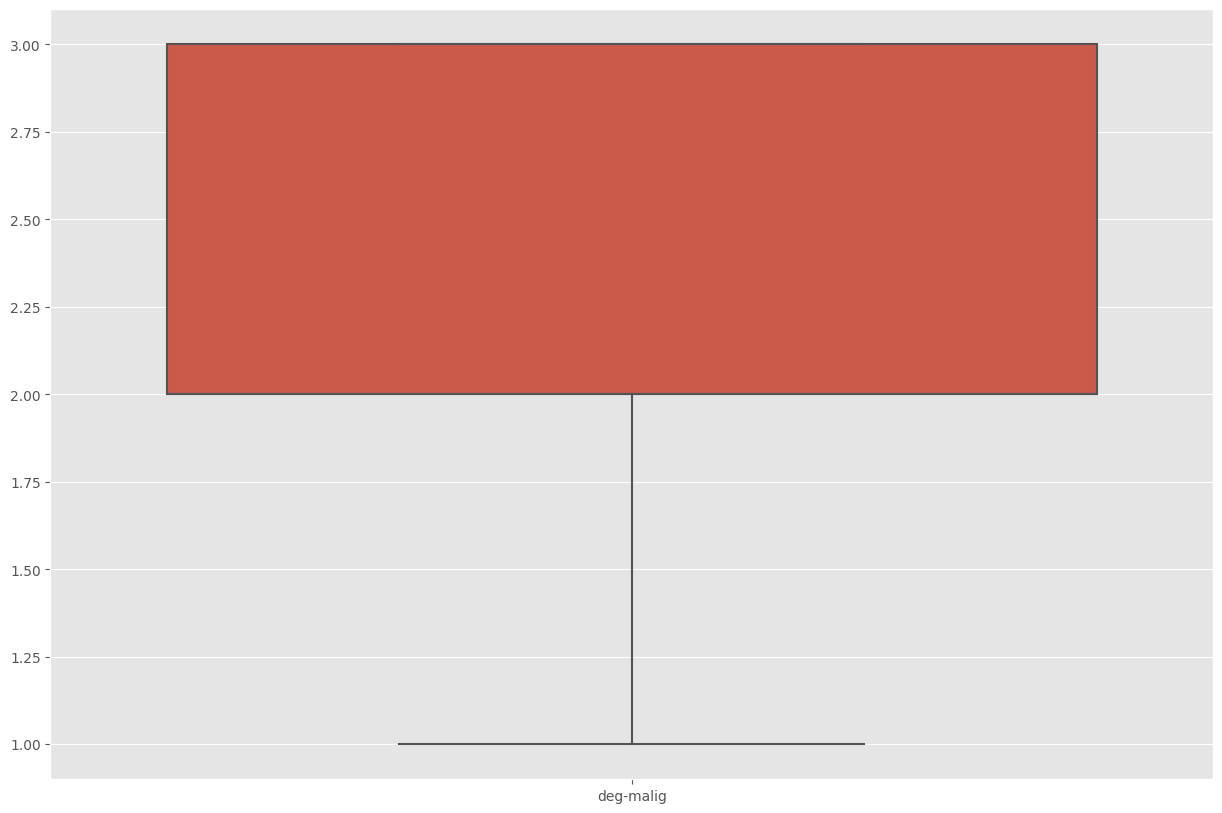

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df);

### A boxplot for an attribute and the target
Put the attribute in the `y` axis, the target in the `x` axis

<AxesSubplot: xlabel='deg-malig', ylabel='irradiat'>

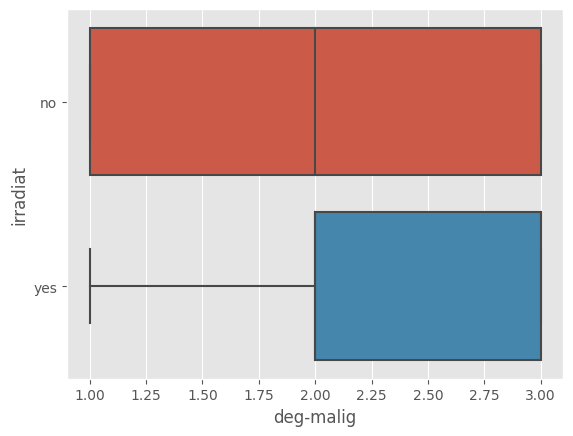

In [16]:
sns.boxplot(x='deg-malig', y='irradiat', data = df)